<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Competitive_DS/blob/week_1/Competitive_ML2_4_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4.6

Для тренировочного датасета сгенерируйте 10 номеров фолдов (от 0 и до 9) так, чтоб в каждом фолде среднее значение регрессионного таргета было примерно одинаковым. Номер фолда запишите в новый столбец num_fold. Допускается разброс значений таргета между фолдами = 300 у.е. Ссылка на датасет.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_1/stratified_valid.csv')
df.head()

,car_id,target_reg,num_fold
0,y13744087j,9492.96,NaN
1,O41613818T,2656.23,NaN
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN


In [3]:
df.shape

(2337, 3)

In [4]:
df['target_reg'].mean()

3824.6007445442874

Всего 2337. Если делить на 10 фолдов, то в один фолд будет входить примерно 233 объекта. Посмотрим среднюю первых 233.

In [5]:
df.iloc[0:233]['target_reg'].mean()

4056.4657510729617

In [ ]:
# df_tmp = df.sort_values(by='target_reg', ascending=False)
# df_tmp.head()

,car_id,target_reg,num_fold
187,I13914989Z,104377.42,NaN
505,i-1106718P,97699.24,NaN
1702,v22568580b,83280.79,NaN
486,s-1243339h,73135.20,NaN
1447,p22133368b,72270.26,NaN


In [ ]:
# df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')

,num_fold,target_reg


In [ ]:
# df_tmp = pd.qcut(df['target_reg'], q=10)
# df_tmp

In [ ]:
import seaborn as sns

tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
# sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar")

In [7]:
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
n_splits = 10

# kf = KFold(n_splits=n_splits, shuffle=False, random_state=7575)
kf = KFold(n_splits=n_splits, shuffle=False)

kf.get_n_splits(df)

10

In [ ]:
print(kf)

KFold(n_splits=10, random_state=7575, shuffle=True)


In [ ]:
train_index = [0, 1]

In [ ]:
# df.iloc[[list(train_index[1])]]['target_reg'].mean()

## Конечный вариант как сработало. Рандом стейт пришлось сделать 0. Возможно можно было циклом проверять при каком р-с бполучилось бы всё сделать, но получилось просто наугад.

Исходил из того, что нам нужно ЦПТ. И тогда мы в среднем попадём в диапазон среднего +-150

In [8]:
n_splits = 10

kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
# kf = KFold(n_splits=n_splits, shuffle=False)

# kf.get_n_splits(df)

for i, (train_index, test_index) in enumerate(kf.split(df)):
  print(f"Fold {i}:")
  #  print(f"  Train: index={len(train_index)}")
  #  print(list(test_index))
  df.iloc[list(test_index), 2] = i
  print(df.iloc[list(test_index)]['target_reg'].mean())
  #  print(f"  Test:  index={test_index}")
  #  df.iloc[[list(train_index[1])]]['target_reg'].mean()
std = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()
print(f'metrics = {std}')

Fold 0:
3988.223162393162
Fold 1:
3802.718376068376
Fold 2:
3548.533888888889
Fold 3:
3910.467307692308
Fold 4:
3483.319572649573
Fold 5:
3800.0802991452993
Fold 6:
3880.424743589744
Fold 7:
3615.2018884120175
Fold 8:
3684.575493562232
Fold 9:
4534.001072961373
metrics = 297.71930473335226


In [ ]:
df.to_csv('/content/out.csv', index=False)

In [ ]:
# df['num_fold'].count()

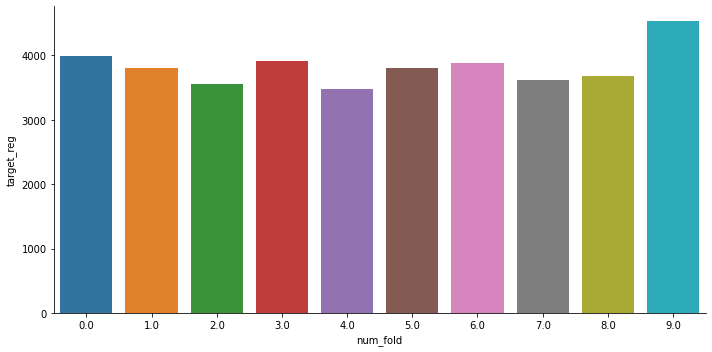

In [9]:
import seaborn as sns

tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

In [ ]:
# df['num_fold'] = 

In [ ]:
# df_tmp = df.copy()
# df_tmp

# tmp_lst = [0, 1]

In [ ]:
# df_tmp.iloc[tmp_lst, 2] = 1
# df_tmp

,car_id,target_reg,num_fold
0,y13744087j,9492.96,1.0
1,O41613818T,2656.23,1.0
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN
...,...,...,...
2332,j21246192N,547.30,NaN
2333,h-1554287F,26414.19,NaN
2334,A15262612g,2677.95,NaN
2335,W-2514493U,2213.63,NaN


In [ ]:
df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

434.7889213276008

# 2.4.7

Для тренировочного датасета сгенерируйте 5 фолдов (от 0 и до 4) так, чтоб в каждом фолде число всех классов было примерно одинаковым (сбалансированным). Номер фолда запишите в новый столбец kfold. Допускается средний разброс значений таргета между фолдами хотя бы = 9.5 у.е.  Ссылка на датасет для стратификации:

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_1/multi_label.csv')
df

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3819,1,0,0,0,0,0,0,0,0,0,0,0
9996,3817,0,1,0,0,0,0,1,0,0,0,0,1
9997,3816,1,0,0,0,0,0,0,0,0,1,0,0
9998,3814,0,1,0,0,0,0,0,0,0,1,0,1


In [33]:
import numpy as np
df['kfold'] = np.NaN
# df['y'] = 1
df

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science,kfold
0,9431,1,0,1,1,0,0,0,0,0,0,0,0,NaN
1,7960,1,1,0,1,0,0,0,0,0,0,0,1,NaN
2,8578,1,1,0,1,0,0,0,0,0,1,0,0,NaN
3,1651,1,0,1,1,0,0,0,0,0,0,0,0,NaN
4,4011,1,0,1,1,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3819,1,0,0,0,0,0,0,0,0,0,0,0,NaN
9996,3817,0,1,0,0,0,0,1,0,0,0,0,1,NaN
9997,3816,1,0,0,0,0,0,0,0,0,1,0,0,NaN
9998,3814,0,1,0,0,0,0,0,0,0,1,0,1,NaN


In [12]:
!pip install iterative-stratification

from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import numpy as np

X = np.array([[1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2], [3,4]])
y = np.array([[0,0], [0,0], [0,1], [0,1], [1,1], [1,1], [1,0], [1,0]])

mskf = MultilabelStratifiedKFold(n_splits=2, shuffle=True, random_state=0)

for train_index, test_index in mskf.split(X, y):
  #  print(train_index)
   print("TRAIN:", train_index, "TEST:", test_index)
  #  print(train_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 3 4 6] TEST: [1 2 5 7]
TRAIN: [1 2 5 7] TEST: [0 3 4 6]


In [ ]:
train_index

array([1, 2, 5, 7])

In [ ]:
X[0], X[3], X[4], X[6]

(array([1, 2]), array([3, 4]), array([1, 2]), array([1, 2]))

In [ ]:
train_index

array([1, 2, 5, 7])

In [ ]:
X_train

array([[3, 4],
       [1, 2],
       [3, 4],
       [3, 4]])

In [ ]:
  df.iloc[0:3, 1:7]

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,1,1,0,0
1,1,1,0,1,0,0
2,1,1,0,1,0,0


In [ ]:
  df.iloc[0:3,7:13]

,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,0,0


## Моё решение - это неверное решение. Просто наугад. Нам нужно было всё перемешать. Я просто разделил первые 6 признаков на X, последние на y. И послал в рекомендованную библиотеку.

In [36]:
n_splits = 5

# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for i, (train_index, test_index) in enumerate(mskf.split(df.iloc[:, 1:7], df.iloc[:, 7:13])):
  print(f"Fold {i}:")
  #  print(f"  Train: index={len(train_index)}")
  #  print(list(test_index))
  df.iloc[list(test_index), 13] = i
  # print(df.iloc[list(test_index)]['target_reg'].mean())
  #  print(f"  Test:  index={test_index}")
  #  df.iloc[[list(train_index[1])]]['target_reg'].mean()
# std = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()
# print(f'metrics = {std}')

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


In [ ]:
X = np.array([[1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2], [3,4]])
y = np.array([[0,0], [0,0], [0,1], [0,1], [1,1], [1,1], [1,0], [1,0]])

In [ ]:
# X

In [ ]:
# df_test = pd.DataFrame(X)
# df_test

In [ ]:
# df

In [15]:
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']
tmp = df.groupby(['kfold'], as_index=False).sum()  
tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
print(tmp_melt.groupby(['class'], as_index=False).std()['count'].mean())

8.825740904667837


In [ ]:
df

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science,kfold
0,9431,1,0,1,1,0,0,0,0,0,0,0,0,2.0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1,3.0
2,8578,1,1,0,1,0,0,0,0,0,1,0,0,3.0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0,1.0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3819,1,0,0,0,0,0,0,0,0,0,0,0,1.0
9996,3817,0,1,0,0,0,0,1,0,0,0,0,1,1.0
9997,3816,1,0,0,0,0,0,0,0,0,1,0,0,1.0
9998,3814,0,1,0,0,0,0,0,0,0,1,0,1,3.0


In [ ]:
tmp

,kfold,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,0.0,9923139,811,615,536,496,47,24,92,5,2,1040,17,1011
1,1.0,10442431,810,575,521,529,62,26,104,13,2,1031,8,1002
2,2.0,10088909,837,549,537,514,57,21,96,2,0,993,19,967
3,3.0,9753611,791,580,549,492,53,19,105,11,3,1025,10,972
4,4.0,9796910,813,550,559,469,68,30,116,10,2,989,16,1003


In [ ]:
tmp_melt

,kfold,class,count
0,0.0,Computer Science,811
1,1.0,Computer Science,810
2,2.0,Computer Science,837
3,3.0,Computer Science,791
4,4.0,Computer Science,813
5,0.0,Physics,615
6,1.0,Physics,575
7,2.0,Physics,549
8,3.0,Physics,580
9,4.0,Physics,550


In [ ]:
df.to_csv('/content/out_2.csv', index=False)

## Другие решения.

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_1/multi_label.csv')
df

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3819,1,0,0,0,0,0,0,0,0,0,0,0
9996,3817,0,1,0,0,0,0,1,0,0,0,0,1
9997,3816,1,0,0,0,0,0,0,0,0,1,0,0
9998,3814,0,1,0,0,0,0,0,0,0,1,0,1


In [ ]:
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=0)

 

targets_scored = df.sample(frac=1).reset_index(drop=True)

targets = df.drop('ID', axis=1).values

for fold_, (train_, valid_) in enumerate(mskf.split(X=targets_scored, y=targets)):

    df.loc[valid_, 'kfold'] = fold_

In [23]:
targets_scored = df.sample(frac=1).reset_index(drop=True)
targets_scored

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,8859,0,0,1,0,0,0,0,0,0,0,0,0
1,8541,0,1,0,0,0,0,0,0,0,1,0,0
2,7097,0,1,0,0,0,0,0,1,0,1,0,0
3,1935,1,0,1,1,0,0,0,0,0,0,0,0
4,3041,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6963,1,0,1,1,0,0,0,1,0,1,0,0
9996,4887,0,1,0,0,0,0,0,0,0,1,0,0
9997,5548,0,1,0,0,0,0,0,0,0,1,0,1
9998,5704,1,0,0,0,0,0,0,0,0,0,0,0


frac - доля объектов в выборке.

In [24]:
df.sample(frac=1)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
7783,1024,1,0,0,0,0,0,0,0,0,1,0,0
9503,4115,0,1,0,0,0,0,0,0,0,1,0,1
7209,287,0,0,0,1,0,0,0,0,0,1,0,0
1236,8062,1,0,1,0,0,0,0,0,0,1,0,1
7418,1064,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,9226,0,0,1,0,0,0,0,0,0,1,0,0
1169,4155,0,0,1,1,0,0,0,0,0,0,0,1
4120,8826,1,0,0,0,0,0,0,0,0,0,0,1
203,2082,1,0,0,1,0,0,0,0,0,0,0,1


In [27]:
targets = df.drop('ID', axis=1).values
targets

array([[1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]])

In [29]:
targets = [0, 1, 2, 4]
y = df.iloc[targets]
y

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0


In [39]:
# df = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_1/multi_label.csv')

# kfolds = 5
# def create_folds(data, num_splits=3, targets = [0, 1, 2, 4]):
#     if num_splits > 1:
#         data['kfold'] = -1
#         X = data
#         y = data.[targets]
#         mskf = MultilabelStratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

#         for fold, (trn_, val_) in enumerate(mskf.split(X, y)):
#             data.loc[val_,'kfold'] = fold
#     else:
#         data.loc[:,'kfold'] = 0
        
#     return data

# df = df.pipe(create_folds, num_splits = kfolds, targets = targets)

# 2.4.7

Настрой валидацию. Сгенерируй и пришли обновленное решение для задачи из предыдуших уроков этого модуля.

Замечание:  Решение должно превосходить скор выше 0.6 

Ссылка на sample_submission.csv 

Пример использования ссылки:

In [333]:
path = 'https://stepik.org/media/attachments/lesson/779913/sample_submission.csv'
sample_submission = pd.read_csv(path)
sample_submission.head()

,car_id,car_rating,year_to_start,riders,year_to_work,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,...,Skoda Rapid,Smart Coupe,Smart ForFour,Smart ForTwo,Tesla Model 3,VW Polo,VW Polo VI,VW Tiguan,Volkswagen ID.4,target_2
0,I-1144396V,4.44,2011,52155,2017,43.522989,5.179892e+07,0.66,104.622717,14.488933,...,0,0,0,0,0,0,1,0,0,gear_stick
1,q13819346b,2.94,2013,27835,2020,44.747126,6.701214e+07,0.10,118.477183,-7.950681,...,0,0,0,0,0,0,0,1,0,wheel_shake
2,O-1088987d,6.70,2015,11755,2019,53.281609,6.319253e+07,0.00,175.661866,-3.994598,...,1,0,0,0,0,0,0,0,0,electro_bug
3,A-2091756g,6.30,2014,204,2017,44.913793,5.588609e+07,0.10,119.437320,0.968330,...,0,0,0,0,0,0,0,0,0,wheel_shake
4,k15500468M,4.16,2015,18630,2016,50.764368,6.841448e+07,0.10,182.053458,-3.280521,...,0,0,1,0,0,0,0,0,0,engine_ignition


In [334]:
sample_submission.shape

(1913, 45)

In [335]:
sample_submission.dtypes

car_id                       object
car_rating                  float64
year_to_start                 int64
riders                        int64
year_to_work                  int64
mean_rating                 float64
distance_sum                float64
rating_min                  float64
speed_max                   float64
user_ride_quality_median    float64
deviation_normal_count        int64
user_uniq                     int64
business                      int64
economy                       int64
premium                       int64
standart                      int64
electro                       int64
petrol                        int64
Audi A3                       int64
Audi A4                       int64
Audi Q3                       int64
BMW 320i                      int64
Fiat 500                      int64
Hyundai Solaris               int64
Kia Rio                       int64
Kia Rio X                     int64
Kia Rio X-line                int64
Kia Sportage                

(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
1687,D-1643531L,Renault Kaptur,standart,petrol,4.72,2012,22296,2021,4800.57,engine_check
1118,S-1907504N,Smart ForTwo,economy,petrol,4.66,2017,114029,2016,4964.62,electro_bug
1887,P-2086663p,VW Polo,economy,petrol,4.26,2015,95986,2018,9657.67,engine_ignition


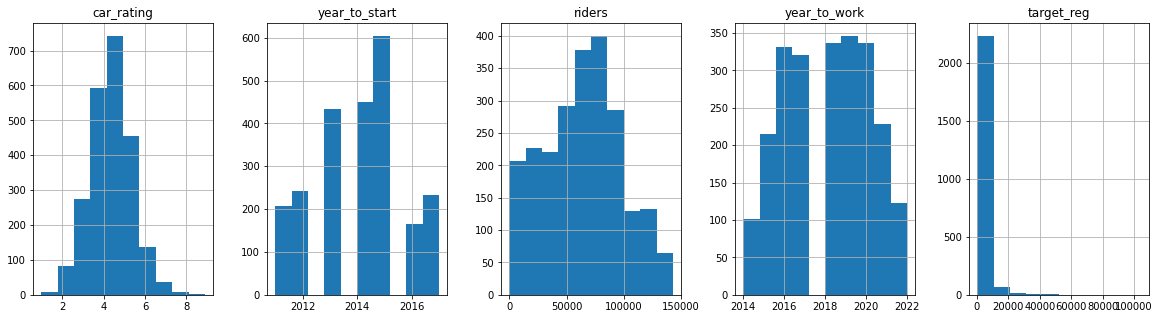

In [336]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
train = pd.read_csv(path)
print(train.shape)
train.hist(figsize=(20, 5), layout = (-1, 5))
train.sample(3)

In [337]:
train.describe()

,car_rating,year_to_start,riders,year_to_work,target_reg
count,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000
mean,4.354292,2014.040650,63711.443731,2018.069748,3824.600745
std,0.996954,1.685852,33755.012096,2.159484,6171.887272
min,0.980000,2011.000000,23.000000,2014.000000,225.540000
25%,3.740000,2013.000000,41053.000000,2016.000000,1215.790000
50%,4.360000,2014.000000,64415.000000,2018.000000,2352.100000
75%,5.000000,2015.000000,86515.000000,2020.000000,4334.850000
max,8.900000,2017.000000,142862.000000,2022.000000,104377.420000


In [338]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv'
test = pd.read_csv(path)
print(test.shape)
test.sample(3)

(1913, 8)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
610,R-2027359R,Kia Rio,economy,petrol,6.80,2011,2206,2021
1435,u12970971g,Nissan Qashqai,standart,petrol,4.82,2013,43169,2020
1209,O20309077v,Kia Rio X,economy,petrol,2.52,2015,80359,2018


In [339]:
features2drop = ['car_id'] # то что надо выбросить 
targets = ['target_class', 'target_reg'] # таргеты
cat_features = ['car_type', 'fuel_type', 'model'] # категориальные признаки

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]

print('cat_features :', len(cat_features), cat_features)
print('num_features :', len(num_features), num_features)
print('targets', targets)

cat_features : 3 ['car_type', 'fuel_type', 'model']
num_features : 4 ['car_rating', 'year_to_start', 'riders', 'year_to_work']
targets ['target_class', 'target_reg']


In [45]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.8 MB/s eta 0:00:00


In [340]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #, mean_squared_error

In [141]:
# X = train[filtered_features].drop(targets, axis=1, errors='ignore')
# y = train['target_class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = CatBoostClassifier(cat_features=cat_features)


# clf.fit(X_train, y_train, 
#           eval_set=(X_test, y_test),
#           verbose=150, plot=False)

# # инференс модели
# y_pred = clf.predict(X_test)
# print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')

In [341]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv'
rides = pd.read_csv(path)
rides.sample(5)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
695811,x26091640i,x-1078063X,g1V,2020-03-25,4.43,319,3184,53,84.000000,1,748.330919,0,-3.959820,1.952
453713,E38674004G,g-1168593W,Z1u,2020-02-20,3.01,19,300,39,131.000000,0,783.983717,0,14.895581,20.627
688785,h19532500m,w-7960339R,C1J,2020-02-19,5.42,24,235,62,96.515944,0,1540.455645,0,15.281463,-20.112
567470,B21677949s,o-1588203t,n1o,2020-01-30,1.94,17,267,41,88.000000,0,570.212752,0,-8.095262,-0.003
364034,E18612841O,a-1298983n,g1w,2020-01-15,5.94,15,132,50,63.000000,1,418.925526,0,5.976109,-0.001


In [342]:
f = lambda x: x.nunique()
rides_df_gr = rides.groupby('car_id', as_index=False).agg(mean_rating = ('speed_avg', 'mean'),
                                                   distance_sum = ('distance', 'sum'),
                                                   rating_min = ('rating', 'min'),
                                                   speed_max = ('speed_max', 'max'),
                                                   user_ride_quality_median = ('user_ride_quality', 'median'), 
                                                   deviation_normal_count = ('deviation_normal', 'count'),
                                                   user_uniq = ('user_id', f))


rides_df_gr.head(2)

,car_id,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,A-1049127W,49.459770,1.125753e+07,0.1,179.729652,-0.288229,174,172
1,A-1079539w,49.591954,1.912765e+07,0.1,184.505566,2.508746,174,173


In [343]:
def add_featues(df):
    
    if 'mean_rating' not in df.columns:
        return df.merge(rides_df_gr, on = 'car_id', how = 'left')
    
    return df
    
    
train = add_featues(train)
test = add_featues(test)

In [52]:
# filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
# num_features = [i for i in filtered_features if i not in cat_features]


# print('num_features :', len(num_features), num_features)
# print('cat_features :', len(cat_features), cat_features)
# print('targets', targets)

num_features : 11 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
cat_features : 3 ['car_type', 'fuel_type', 'model']
targets ['target_class', 'target_reg']


In [344]:
features2drop = ["car_id", "target_reg"]  # То, что можно выбросить
targets = ["target_class", "target_reg"]  # Таргеты
cat_features = ["car_type", "fuel_type", "model"]

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print("cat_features :", len(cat_features), cat_features)
print("num_features :", len(num_features), num_features)
print("targets", targets)

cat_features : 3 ['car_type', 'fuel_type', 'model']
num_features : 11 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq']
targets ['target_class', 'target_reg']


## C k-fold

In [345]:
X = train[filtered_features].drop(targets, axis=1, errors='ignore')
y = train['target_class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_splits = 5
clfs = []
scores = []

kf = KFold(n_splits=n_splits, shuffle=True, random_state=7575)
for num, (train_index, test_index) in enumerate(kf.split(X)):

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf = CatBoostClassifier(cat_features=cat_features)
  clfs.append(clf)

  clf.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=False, plot=False)
   

  y_pred = clf.predict(X_test)  
  print(f'\n Accuracy: {accuracy_score(y_test.values, y_pred)}')
  score = np.mean(np.array(y_pred == y_test.values))
  scores.append(score)
  print(f"fold: {num} acc: {score}")

assert len(clfs) == n_splits  # Проверка, что все ок

# Считаем среднее и дисперсию по всем фолдам
print("mean accuracy score --", np.mean(scores, dtype="float16"), np.std(scores).round(4))


 Accuracy: 0.7222222222222222
fold: 0 acc: 0.11621100883921397

 Accuracy: 0.7115384615384616
fold: 1 acc: 0.11463127328511943

 Accuracy: 0.7601713062098501
fold: 2 acc: 0.11264667177161618

 Accuracy: 0.728051391862955
fold: 3 acc: 0.11062914681620806

 Accuracy: 0.7194860813704497
fold: 4 acc: 0.11355455800154983
mean accuracy score -- 0.1136 0.0019


In [278]:
# y_test.values.shape

In [279]:
# path = "https://stepik.org/media/attachments/lesson/779913/sample_submission.csv"
# sub_y = pd.read_csv(path)

In [280]:
# sub_y.columns

In [281]:
# path = "https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_1/sample_submission_1.csv"
# # path = "https://stepik.org/media/attachments/lesson/779913/sample_submission.csv"
# sub_x = pd.read_csv(path)

In [282]:
# sub_x.head()

In [283]:
# sub_x.dtypes

In [346]:
# path = "https://raw.githubusercontent.com/nedokormysh/Stepik_Competitive_DS/week_1/sample_submission_1.csv"
path = "https://stepik.org/media/attachments/lesson/779913/sample_submission.csv"
sub_ct = pd.read_csv(path)

# массив для записи финального прогноза size*n_class
y_pred = np.zeros((sub_ct.shape[0], train[targets].nunique()[0]))

# Используем все модели из списка clfs для инференса
for n, clf in enumerate(clfs):
    y_pred += clf.predict_proba(test[filtered_features])

f = lambda x: clf.classes_[x]

sub_ct['target_2'] = list(map(f, y_pred.argmax(axis=1)))

sub_ct.to_csv('last_chance_11.csv', index=False)

In [320]:
sample_submission['car_id'].head(10)

0    I-1144396V
1    q13819346b
2    O-1088987d
3    A-2091756g
4    k15500468M
5    b-8173252P
6    t-1101328j
7    r22877602B
8    f18117990q
9    D70075253J
Name: car_id, dtype: object

In [318]:
sub_ct['car_id'].head(10)

0    I-1144396V
1    q13819346b
2    O-1088987d
3    A-2091756g
4    k15500468M
5    b-8173252P
6    t-1101328j
7    r22877602B
8    f18117990q
9    D70075253J
Name: car_id, dtype: object

In [347]:
sample_submission.iloc[:, 0:44].equals(sub_ct.iloc[:, 0:44])

True

In [305]:
sample_submission['target_2'].unique()

array(['gear_stick', 'wheel_shake', 'electro_bug', 'engine_ignition',
       'engine_check', 'break_bug', 'engine_overheat', 'engine_fuel',
       'another_bug'], dtype=object)

In [306]:
sub_ct['target_2'].unique()

array(['engine_overheat', 'electro_bug', 'wheel_shake', 'break_bug',
       'gear_stick', 'engine_check', 'engine_ignition', 'another_bug',
       'engine_fuel'], dtype=object)

In [348]:
sample_submission.shape, sub_ct.shape

((1913, 45), (1913, 45))

In [329]:
sub_ct.head()

,car_id,car_rating,year_to_start,riders,year_to_work,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,...,Skoda Rapid,Smart Coupe,Smart ForFour,Smart ForTwo,Tesla Model 3,VW Polo,VW Polo VI,VW Tiguan,Volkswagen ID.4,target_2
0,I-1144396V,4.44,2011,52155,2017,43.522989,5.179892e+07,0.66,104.622717,14.488933,...,0,0,0,0,0,0,1,0,0,engine_overheat
1,q13819346b,2.94,2013,27835,2020,44.747126,6.701214e+07,0.10,118.477183,-7.950681,...,0,0,0,0,0,0,0,1,0,electro_bug
2,O-1088987d,6.70,2015,11755,2019,53.281609,6.319253e+07,0.00,175.661866,-3.994598,...,1,0,0,0,0,0,0,0,0,wheel_shake
3,A-2091756g,6.30,2014,204,2017,44.913793,5.588609e+07,0.10,119.437320,0.968330,...,0,0,0,0,0,0,0,0,0,break_bug
4,k15500468M,4.16,2015,18630,2016,50.764368,6.841448e+07,0.10,182.053458,-3.280521,...,0,0,1,0,0,0,0,0,0,electro_bug


In [308]:
sample_submission.dtypes

car_id                       object
car_rating                  float64
year_to_start                 int64
riders                        int64
year_to_work                  int64
mean_rating                 float64
distance_sum                float64
rating_min                  float64
speed_max                   float64
user_ride_quality_median    float64
deviation_normal_count        int64
user_uniq                     int64
business                      int64
economy                       int64
premium                       int64
standart                      int64
electro                       int64
petrol                        int64
Audi A3                       int64
Audi A4                       int64
Audi Q3                       int64
BMW 320i                      int64
Fiat 500                      int64
Hyundai Solaris               int64
Kia Rio                       int64
Kia Rio X                     int64
Kia Rio X-line                int64
Kia Sportage                

In [309]:
sub_ct.dtypes

car_id                       object
car_rating                  float64
year_to_start                 int64
riders                        int64
year_to_work                  int64
mean_rating                 float64
distance_sum                float64
rating_min                  float64
speed_max                   float64
user_ride_quality_median    float64
deviation_normal_count        int64
user_uniq                     int64
business                      int64
economy                       int64
premium                       int64
standart                      int64
electro                       int64
petrol                        int64
Audi A3                       int64
Audi A4                       int64
Audi Q3                       int64
BMW 320i                      int64
Fiat 500                      int64
Hyundai Solaris               int64
Kia Rio                       int64
Kia Rio X                     int64
Kia Rio X-line                int64
Kia Sportage                

In [86]:
# list(map(f, y_pred.argmax(axis=1)))

In [168]:
sub['target_2']

0       engine_overheat
1           electro_bug
2           wheel_shake
3             break_bug
4           electro_bug
             ...       
1908       engine_check
1909    engine_overheat
1910         gear_stick
1911       engine_check
1912       engine_check
Name: target_2, Length: 1913, dtype: object

In [92]:
len(sub.columns)

46

## Образцовое решение.

In [238]:
# train = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
# test = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv")

train = pd.read_csv("/content/car_train.csv")
test = pd.read_csv("/content/car_test.csv")
# train.hist(figsize=(25, 5), layout=(-1, 5))
train.sample(3)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
640,s47589001I,VW Tiguan,economy,petrol,3.26,2017,127367,2018,704.23,electro_bug
211,Y-1582411z,Smart ForFour,economy,petrol,2.98,2016,115362,2015,7876.67,engine_ignition
292,m20786215a,Smart Coupe,economy,petrol,3.90,2015,88518,2021,5488.20,engine_ignition


In [239]:
# path = "https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv"
path = "/content/rides_info.csv"
rides = pd.read_csv(path)  # Данные по поездкам
# rides.hist(figsize=(15, 5), layout=(-1, 3))
rides.sample(3)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
31611,R49792615g,C-1370961Z,I1C,2020-03-03,4.32,80,953,76,126.755659,0,6132.685001,0,11.158850,2.651
235867,V27313133N,Q12359942h,j1p,2020-02-21,7.50,39,502,54,71.000000,1,1652.788252,0,-4.250276,20.567
72036,T22158283R,F-1720906M,d1N,2020-01-01,6.97,15,189,34,63.000000,1,423.736081,0,-1.355399,1.369


In [240]:
f = lambda x: x.nunique()
rides_df_gr = rides.groupby("car_id", as_index=False).agg(
    mean_rating=("speed_avg", "mean"),
    distance_sum=("distance", "sum"),
    rating_min=("rating", "min"),
    speed_max=("speed_max", "max"),
    user_ride_quality_median=("user_ride_quality", "median"),
    deviation_normal_count=("deviation_normal", "count"),
    user_uniq=("user_id", f),
)


rides_df_gr.head(2)

,car_id,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,A-1049127W,49.459770,1.125753e+07,0.1,179.729652,-0.288229,174,172
1,A-1079539w,49.591954,1.912765e+07,0.1,184.505566,2.508746,174,173


In [241]:
def add_featues(df):

    if "mean_rating" not in df.columns:
        return df.merge(rides_df_gr, on="car_id", how="left")

    return df


train = add_featues(train)
test = add_featues(test)

In [242]:
cat_features = ["car_type", "fuel_type", "model"]
train = pd.get_dummies(train, columns=cat_features)
test = pd.get_dummies(test, columns=cat_features)

train.head(4)

,car_id,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,...,model_Renault Sandero,model_Skoda Rapid,model_Smart Coupe,model_Smart ForFour,model_Smart ForTwo,model_Tesla Model 3,model_VW Polo,model_VW Polo VI,model_VW Tiguan,model_Volkswagen ID.4
0,y13744087j,3.78,2015,76163,2021,9492.96,another_bug,44.660920,1.214131e+07,0.1,...,0,0,0,0,0,0,0,0,0,0
1,O41613818T,3.90,2015,78218,2021,2656.23,electro_bug,49.862069,1.803909e+07,0.0,...,0,0,0,0,0,0,0,1,0,0
2,d-2109686j,6.30,2012,23340,2017,1526.11,gear_stick,44.005747,1.588366e+07,0.1,...,1,0,0,0,0,0,0,0,0,0
3,u29695600e,4.04,2011,1263,2020,1338.00,engine_fuel,49.344828,1.651883e+07,0.1,...,0,0,0,0,0,0,0,0,0,0


In [243]:
features2drop = ["car_id", "target_reg"]  # То, что можно выбросить
targets = ["target_class", "target_reg"]  # Таргеты
cat_features = ["car_type", "fuel_type", "model"]

filtered_features = [i for i in train.columns if (i not in targets and i not in features2drop)]
num_features = [i for i in filtered_features if i not in cat_features]


print("cat_features :", len(cat_features), cat_features)
print("num_features :", len(num_features), num_features)
print("targets", targets)

cat_features : 3 ['car_type', 'fuel_type', 'model']
num_features : 43 ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'deviation_normal_count', 'user_uniq', 'car_type_business', 'car_type_economy', 'car_type_premium', 'car_type_standart', 'fuel_type_electro', 'fuel_type_petrol', 'model_Audi A3', 'model_Audi A4', 'model_Audi Q3', 'model_BMW 320i', 'model_Fiat 500', 'model_Hyundai Solaris', 'model_Kia Rio', 'model_Kia Rio X', 'model_Kia Rio X-line', 'model_Kia Sportage', 'model_MINI CooperSE', 'model_Mercedes-Benz E200', 'model_Mercedes-Benz GLC', 'model_Mini Cooper', 'model_Nissan Qashqai', 'model_Renault Kaptur', 'model_Renault Sandero', 'model_Skoda Rapid', 'model_Smart Coupe', 'model_Smart ForFour', 'model_Smart ForTwo', 'model_Tesla Model 3', 'model_VW Polo', 'model_VW Polo VI', 'model_VW Tiguan', 'model_Volkswagen ID.4 ']
targets ['target_class', 'target_reg']


In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold

In [244]:
X = train[filtered_features].drop(targets, axis=1, errors="ignore")
y = train[["target_class"]]


clfs = []
scores = []
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=7575)

for train_index, test_index in kf.split(X=X, y=y["target_class"]):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # print(X_train.shape, y_train.shape)
    clf = RandomForestClassifier(
        n_estimators=2_000,
        min_samples_leaf=4,
        n_jobs=-1,
        max_features=0.60,
        random_state=7575,
        max_depth=6,
    )
    clfs.append(clf)

    clf.fit(X_train, y_train["target_class"])

    y_pred = clf.predict(X_test)
    score = np.mean(np.array(y_pred == y_test["target_class"]))
    scores.append(score)
    print(f"fold: acc: {score}")

assert len(clfs) == n_splits
print(
    "mean accuracy score --", np.mean(scores, dtype="float16"), np.std(scores).round(4)
)

fold: acc: 0.7051282051282052
fold: acc: 0.7585470085470085
fold: acc: 0.7301927194860813
fold: acc: 0.734475374732334
fold: acc: 0.7173447537473233
mean accuracy score -- 0.729 0.0179


In [245]:
path = 'https://stepik.org/media/attachments/lesson/779913/sample_submission.csv'
sample_submission = pd.read_csv(path)
# sample_submission.head()

In [246]:
sample_submission.columns

Index(['car_id', 'car_rating', 'year_to_start', 'riders', 'year_to_work',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq',
       'business', 'economy', 'premium', 'standart', 'electro', 'petrol',
       'Audi A3', 'Audi A4', 'Audi Q3', 'BMW 320i', 'Fiat 500',
       'Hyundai Solaris', 'Kia Rio', 'Kia Rio X', 'Kia Rio X-line',
       'Kia Sportage', 'MINI CooperSE', 'Mercedes-Benz E200',
       'Mercedes-Benz GLC', 'Mini Cooper', 'Nissan Qashqai', 'Renault Kaptur',
       'Renault Sandero', 'Skoda Rapid', 'Smart Coupe', 'Smart ForFour',
       'Smart ForTwo', 'Tesla Model 3', 'VW Polo', 'VW Polo VI', 'VW Tiguan',
       'Volkswagen ID.4 ', 'target_2'],
      dtype='object')

In [247]:
sub.columns

Index(['car_id', 'car_rating', 'year_to_start', 'riders', 'year_to_work',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq',
       'business', 'economy', 'premium', 'standart', 'electro', 'petrol',
       'Audi A3', 'Audi A4', 'Audi Q3', 'BMW 320i', 'Fiat 500',
       'Hyundai Solaris', 'Kia Rio', 'Kia Rio X', 'Kia Rio X-line',
       'Kia Sportage', 'MINI CooperSE', 'Mercedes-Benz E200',
       'Mercedes-Benz GLC', 'Mini Cooper', 'Nissan Qashqai', 'Renault Kaptur',
       'Renault Sandero', 'Skoda Rapid', 'Smart Coupe', 'Smart ForFour',
       'Smart ForTwo', 'Tesla Model 3', 'VW Polo', 'VW Polo VI', 'VW Tiguan',
       'Volkswagen ID.4 ', 'target_2', 'target_class'],
      dtype='object')

In [252]:
path = "https://stepik.org/media/attachments/lesson/779913/sample_submission.csv"
sub_rf = pd.read_csv(path)

# массив для записи финального прогноза size*n_class
y_pred = np.zeros((sub.shape[0], train[targets].nunique()[0]))

# Используем все модели из списка clfs для инференса
for n, clf in enumerate(clfs):
    y_pred += clf.predict_proba(test[filtered_features])

f = lambda x: clf.classes_[x]
# sub_rf["target_class"] = list(map(f, y_pred.argmax(axis=1)))

# sub[["car_id", "target_class"]].to_csv("out_rf_1.csv", index=False)
# sub[["car_id", "target_class"]].head()

f = lambda x: clf.classes_[x]
sub_rf["target_2"] = list(map(f, y_pred.argmax(axis=1)))

# sub.head(3)

sub_rf.to_csv("out_rf_7.csv", index=False)

In [253]:
sub_rf.shape


(1913, 45)

In [257]:
sample_submission.head()

,car_id,car_rating,year_to_start,riders,year_to_work,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,...,Skoda Rapid,Smart Coupe,Smart ForFour,Smart ForTwo,Tesla Model 3,VW Polo,VW Polo VI,VW Tiguan,Volkswagen ID.4,target_2
0,I-1144396V,4.44,2011,52155,2017,43.522989,5.179892e+07,0.66,104.622717,14.488933,...,0,0,0,0,0,0,1,0,0,gear_stick
1,q13819346b,2.94,2013,27835,2020,44.747126,6.701214e+07,0.10,118.477183,-7.950681,...,0,0,0,0,0,0,0,1,0,wheel_shake
2,O-1088987d,6.70,2015,11755,2019,53.281609,6.319253e+07,0.00,175.661866,-3.994598,...,1,0,0,0,0,0,0,0,0,electro_bug
3,A-2091756g,6.30,2014,204,2017,44.913793,5.588609e+07,0.10,119.437320,0.968330,...,0,0,0,0,0,0,0,0,0,wheel_shake
4,k15500468M,4.16,2015,18630,2016,50.764368,6.841448e+07,0.10,182.053458,-3.280521,...,0,0,1,0,0,0,0,0,0,engine_ignition


In [259]:
sub_rf.head()

,car_id,car_rating,year_to_start,riders,year_to_work,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,...,Skoda Rapid,Smart Coupe,Smart ForFour,Smart ForTwo,Tesla Model 3,VW Polo,VW Polo VI,VW Tiguan,Volkswagen ID.4,target_2
0,I-1144396V,4.44,2011,52155,2017,43.522989,5.179892e+07,0.66,104.622717,14.488933,...,0,0,0,0,0,0,1,0,0,engine_overheat
1,q13819346b,2.94,2013,27835,2020,44.747126,6.701214e+07,0.10,118.477183,-7.950681,...,0,0,0,0,0,0,0,1,0,electro_bug
2,O-1088987d,6.70,2015,11755,2019,53.281609,6.319253e+07,0.00,175.661866,-3.994598,...,1,0,0,0,0,0,0,0,0,wheel_shake
3,A-2091756g,6.30,2014,204,2017,44.913793,5.588609e+07,0.10,119.437320,0.968330,...,0,0,0,0,0,0,0,0,0,break_bug
4,k15500468M,4.16,2015,18630,2016,50.764368,6.841448e+07,0.10,182.053458,-3.280521,...,0,0,1,0,0,0,0,0,0,electro_bug


In [255]:
sub_rf['target_2'].head()

0    engine_overheat
1        electro_bug
2        wheel_shake
3          break_bug
4        electro_bug
Name: target_2, dtype: object

In [185]:
sub_rf.columns

Index(['car_id', 'car_rating', 'year_to_start', 'riders', 'year_to_work',
       'mean_rating', 'distance_sum', 'rating_min', 'speed_max',
       'user_ride_quality_median', 'deviation_normal_count', 'user_uniq',
       'business', 'economy', 'premium', 'standart', 'electro', 'petrol',
       'Audi A3', 'Audi A4', 'Audi Q3', 'BMW 320i', 'Fiat 500',
       'Hyundai Solaris', 'Kia Rio', 'Kia Rio X', 'Kia Rio X-line',
       'Kia Sportage', 'MINI CooperSE', 'Mercedes-Benz E200',
       'Mercedes-Benz GLC', 'Mini Cooper', 'Nissan Qashqai', 'Renault Kaptur',
       'Renault Sandero', 'Skoda Rapid', 'Smart Coupe', 'Smart ForFour',
       'Smart ForTwo', 'Tesla Model 3', 'VW Polo', 'VW Polo VI', 'VW Tiguan',
       'Volkswagen ID.4 ', 'target_2', 'target_class'],
      dtype='object')

In [116]:
len(sub.columns)

46

In [118]:
df_s = pd.read_csv('/content/out_validation_rf.csv')
df_s

,car_id,car_rating,year_to_start,riders,year_to_work,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,...,Smart Coupe,Smart ForFour,Smart ForTwo,Tesla Model 3,VW Polo,VW Polo VI,VW Tiguan,Volkswagen ID.4,target_2,target_class
0,I-1144396V,4.44,2011,52155,2017,43.522989,5.179892e+07,0.66,104.622717,14.488933,...,0,0,0,0,0,1,0,0,gear_stick,engine_overheat
1,q13819346b,2.94,2013,27835,2020,44.747126,6.701214e+07,0.10,118.477183,-7.950681,...,0,0,0,0,0,0,1,0,wheel_shake,electro_bug
2,O-1088987d,6.70,2015,11755,2019,53.281609,6.319253e+07,0.00,175.661866,-3.994598,...,0,0,0,0,0,0,0,0,electro_bug,wheel_shake
3,A-2091756g,6.30,2014,204,2017,44.913793,5.588609e+07,0.10,119.437320,0.968330,...,0,0,0,0,0,0,0,0,wheel_shake,break_bug
4,k15500468M,4.16,2015,18630,2016,50.764368,6.841448e+07,0.10,182.053458,-3.280521,...,0,1,0,0,0,0,0,0,engine_ignition,electro_bug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,C-5124485K,4.58,2013,14891,2018,48.172414,9.838525e+07,0.10,171.403783,-4.903729,...,0,0,0,0,0,0,0,0,engine_fuel,engine_check
1909,Q20152079M,4.42,2015,10766,2014,45.356322,6.714416e+07,0.10,101.612588,15.067767,...,0,0,0,0,0,0,0,0,gear_stick,engine_overheat
1910,i14645783b,4.00,2015,14628,2022,44.758621,8.922623e+07,0.10,100.750460,-7.354584,...,0,0,0,0,0,0,0,0,engine_check,gear_stick
1911,Q-1815410s,4.58,2015,20283,2017,43.206897,3.649466e+07,0.10,119.000000,-15.127885,...,0,0,0,0,0,0,0,0,wheel_shake,engine_check


In [120]:
len(df_s.columns)

46

In [218]:
train_git = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
test_git = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_test.csv")

# train = pd.read_csv("/content/car_train.csv")
# test = pd.read_csv("/content/car_test.csv")
# train.hist(figsize=(25, 5), layout=(-1, 5))
train_git.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,9492.96,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,2656.23,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,1526.11,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,1338.00,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,825.72,engine_fuel


In [220]:
test_git.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
0,P17494612l,Skoda Rapid,economy,petrol,4.80,2013,42269,2019
1,N-1530212S,Renault Sandero,standart,petrol,4.32,2015,90014,2016
2,B-1154399t,Smart ForTwo,economy,petrol,4.46,2015,82684,2017
3,F12725233R,Smart ForFour,economy,petrol,2.80,2014,68833,2021
4,l-1139189J,Skoda Rapid,economy,petrol,6.56,2013,42442,2021


In [219]:
train_kag = pd.read_csv("/content/car_train.csv")
test_kag = pd.read_csv("/content/car_test.csv")

train_kag.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,9492.96,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,2656.23,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,1526.11,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,1338.00,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,825.72,engine_fuel


In [221]:
test_kag.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
0,P17494612l,Skoda Rapid,economy,petrol,4.80,2013,42269,2019
1,N-1530212S,Renault Sandero,standart,petrol,4.32,2015,90014,2016
2,B-1154399t,Smart ForTwo,economy,petrol,4.46,2015,82684,2017
3,F12725233R,Smart ForFour,economy,petrol,2.80,2014,68833,2021
4,l-1139189J,Skoda Rapid,economy,petrol,6.56,2013,42442,2021
